In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

from pathlib import Path
from skimage.util import dtype

import numpy as np
import pandas as pd

from skimage import img_as_float, io
from skimage.io import imread, imshow, imsave
from skimage.color import rgb2gray

from skimage.exposure import adjust_log, adjust_gamma, adjust_sigmoid, rescale_intensity, equalize_hist, equalize_adapthist

from skimage.restoration import denoise_nl_means, denoise_wavelet, estimate_sigma
#from skimage.metrics import peak_signal_noise_ratio

from skimage.filters import apply_hysteresis_threshold, try_all_threshold, threshold_local, threshold_isodata

In [20]:
def to_gray(rgb: np.ndarray, coefficients: [float], force_copy=False) -> np.ndarray:
    """
    Т.к фишки на нашей доске синего цвета, результат будет лучше, если мы будем использовать
    не стандартные коэффициенты для перевода в оттенки серого, а те, которые будут подавлять
    синие оттенки.

    Это создаст более сильный контраст буквы. И мы сможем эффективнее
    использовать порогование.

    :param rgb: изображение в RGB формате
    :param coefficients: коэффициенты для в перевода в оттенки серого
    :param force_copy:
    :return: изображение в оттенках серого
    """
    # fixme: сейчас исходное изображение слишком шумное

    # Проверяем форму массива, переводим в представление с плавающей точкой.
    rgb = np.asanyarray(rgb)
    if rgb.shape[-1] != 3:
        raise ValueError("Ожидается форма массива == (..., 3)), "
                         f"получено {rgb.shape}")

    rgb = dtype.img_as_float(rgb, force_copy=force_copy)
    if len(coefficients) != 3:
        raise ValueError(f"Ожидается 3 коэффициента, получено {len(coefficients)}")
    coeffs = np.array(coefficients, dtype=rgb.dtype)

    return rgb @ coeffs

In [89]:
def to_binary(image_gray: np.ndarray) -> np.ndarray:
    img_adj = adjust_sigmoid(image_gray)
    return np.array((img_adj > threshold_isodata(img_adj)), dtype='int')

In [91]:
to_binary(to_gray(img1, [1,0,0]))

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [21]:
IMG_PATH_1 = Path.cwd().parent / Path('CV') / Path('test1.jpg')
IMG_PATH_2 = Path.cwd().parent / Path('CV') / Path('test2.jpg')
IMG_PATH_3 = Path.cwd().parent / Path('CV') / Path('test3.jpg')
IMG_PATH_4 = Path.cwd().parent / Path('CV') / Path('test4.jpg')
IMG_PATH_5 = Path.cwd().parent / Path('CV') / Path('test5.jpg')
IMG_PATH_6 = Path.cwd().parent / Path('CV') / Path('test6.jpg')
IMG_PATH_7 = Path.cwd().parent / Path('CV') / Path('test7.jpg')
IMG_PATH_8 = Path.cwd().parent / Path('CV') / Path('test8.jpg')
IMG_PATH_9 = Path.cwd().parent / Path('CV') / Path('test9.jpg')

In [100]:
img1 = imread(IMG_PATH_1)
img2 = imread(IMG_PATH_2)
img3 = imread(IMG_PATH_3)
img4 = imread(IMG_PATH_4)
img5 = imread(IMG_PATH_5)
img6 = imread(IMG_PATH_6)
img7 = imread(IMG_PATH_7)
img8 = imread(IMG_PATH_8)
img9 = imread(IMG_PATH_9)
img1.reshape(img1.shape[0] * img1.shape[1], 3)

array([[249, 242, 234],
       [235, 231, 222],
       [222, 218, 209],
       ...,
       [177, 171, 147],
       [177, 171, 149],
       [179, 173, 151]], dtype=uint8)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 7200x4320 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E088145C88>,
       dtype=object))

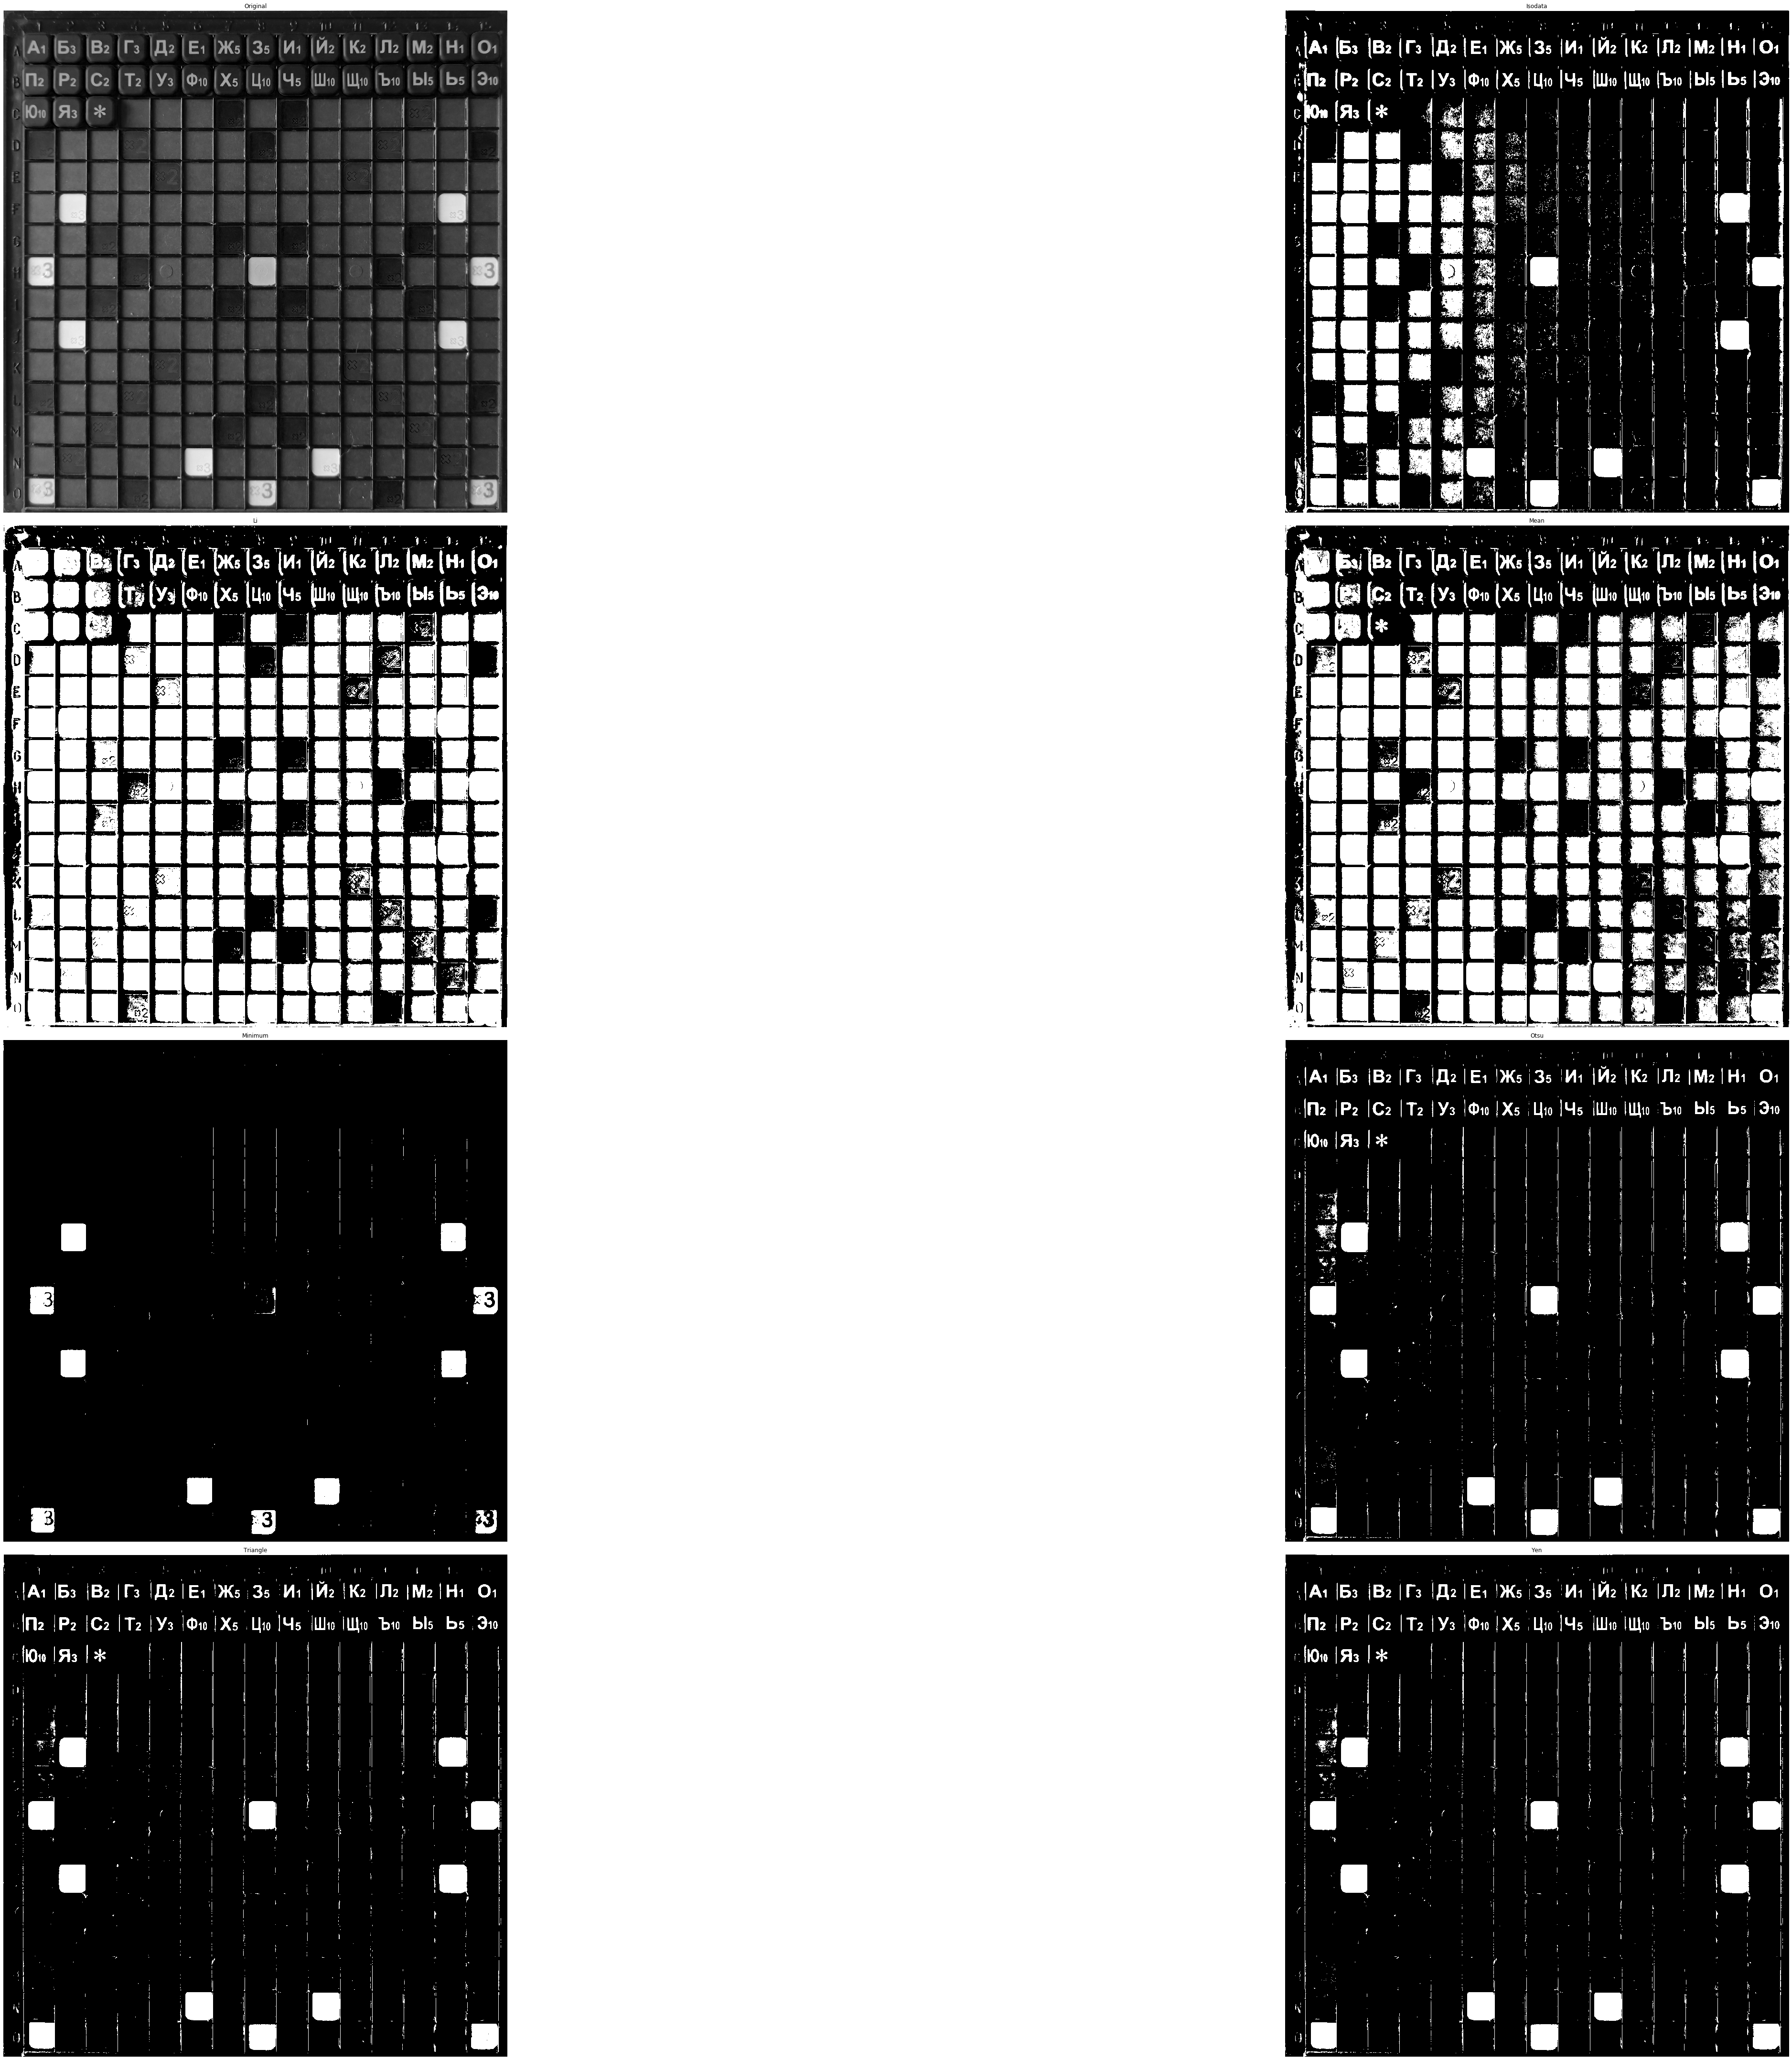

In [25]:
#to_gray(img5, [1,0,0])
try_all_threshold(to_gray(img9, [1,0,0]), figsize=(100, 60))

In [26]:
img1_gray = to_gray(img1, [1,0,0])
img2_gray = to_gray(img2, [1,0,0])
img3_gray = to_gray(img3, [1,0,0])
img4_gray = to_gray(img4, [1,0,0])
img5_gray = to_gray(img5, [1,0,0])
img6_gray = to_gray(img6, [1,0,0])
img7_gray = to_gray(img7, [1,0,0])
img8_gray = to_gray(img8, [1,0,0])
img9_gray = to_gray(img9, [1,0,0])

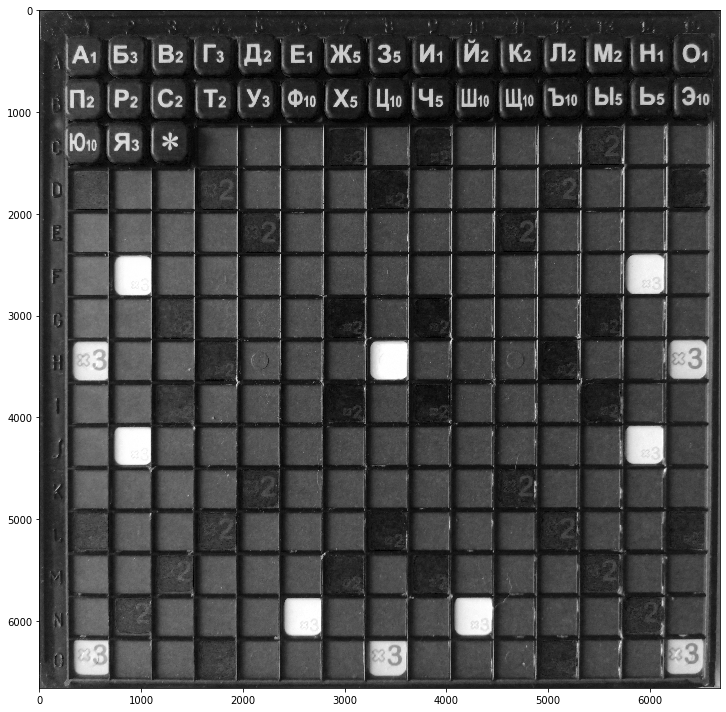

In [93]:
imsave(img1_gray)

In [9]:
'''img1_denoised = denoise_nl_means(img1_gray)
img2_denoised = denoise_nl_means(img2_gray)
img3_denoised = denoise_nl_means(img3_gray)
img4_denoised = denoise_nl_means(img4_gray)'''

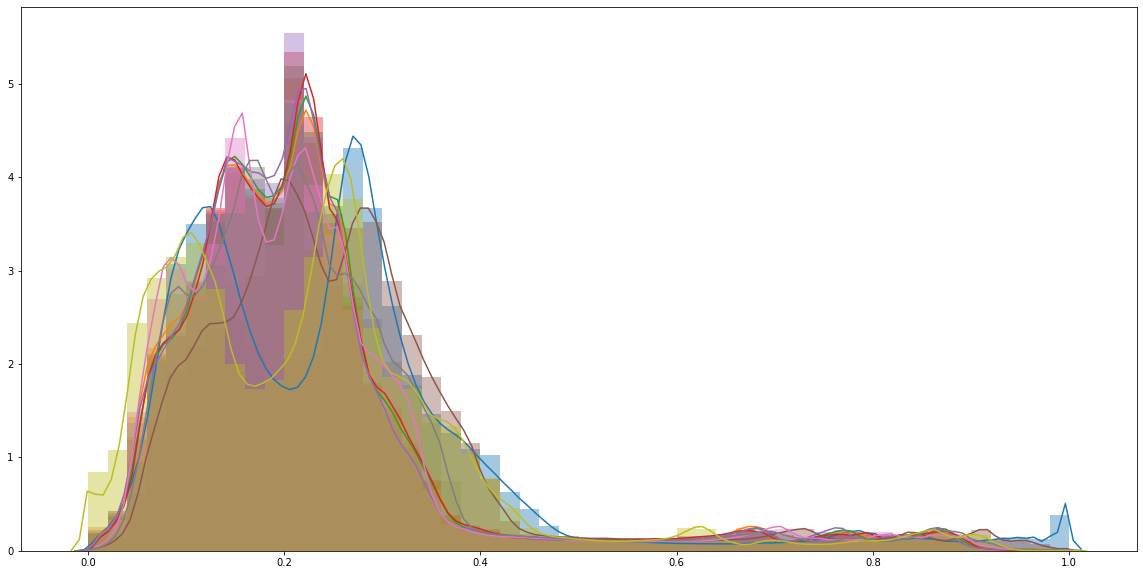

In [27]:
sns_plot = sns.distplot(img1_gray.ravel())
sns_plot = sns.distplot(img2_gray.ravel())
sns_plot = sns.distplot(img3_gray.ravel())
sns_plot = sns.distplot(img4_gray.ravel())
sns_plot = sns.distplot(img5_gray.ravel())
sns_plot = sns.distplot(img6_gray.ravel())
sns_plot = sns.distplot(img7_gray.ravel())
sns_plot = sns.distplot(img8_gray.ravel())
sns_plot = sns.distplot(img9_gray.ravel())
fig = sns_plot.get_figure()

In [28]:
img1_adjusted = adjust_sigmoid(img1_gray)
img2_adjusted = adjust_sigmoid(img2_gray)
img3_adjusted = adjust_sigmoid(img3_gray)
img4_adjusted = adjust_sigmoid(img4_gray)
img5_adjusted = adjust_sigmoid(img5_gray)
img6_adjusted = adjust_sigmoid(img6_gray)
img7_adjusted = adjust_sigmoid(img7_gray)
img8_adjusted = adjust_sigmoid(img8_gray)
img9_adjusted = adjust_sigmoid(img9_gray)

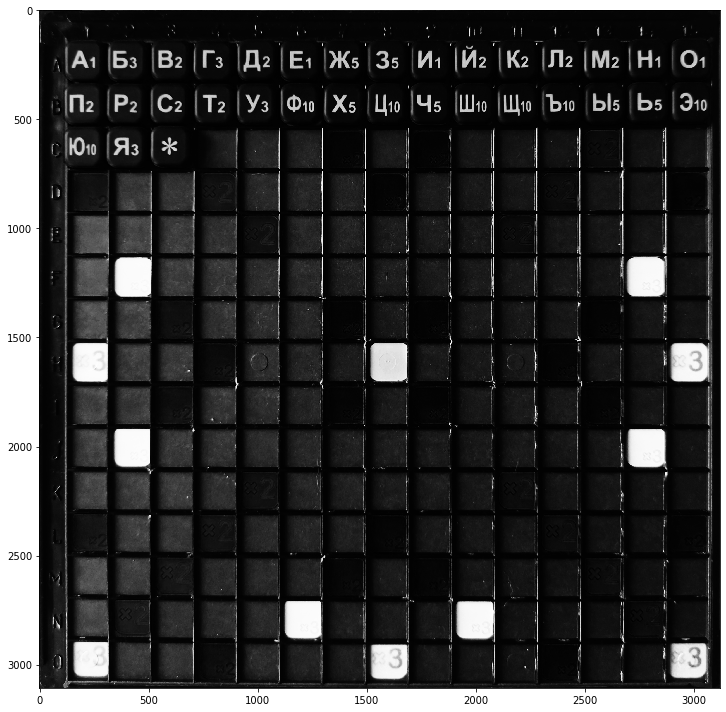

In [37]:
imshow(img9_adjusted)

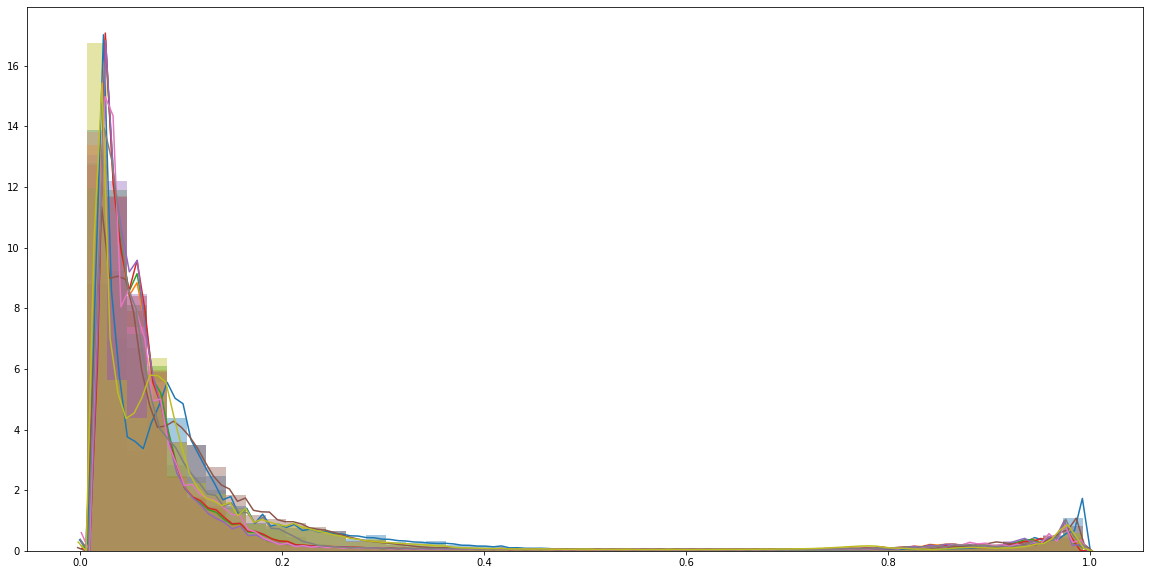

In [38]:
sns_plot = sns.distplot(img1_adjusted.ravel())
sns_plot = sns.distplot(img2_adjusted.ravel())
sns_plot = sns.distplot(img3_adjusted.ravel())
sns_plot = sns.distplot(img4_adjusted.ravel())
sns_plot = sns.distplot(img5_adjusted.ravel())
sns_plot = sns.distplot(img6_adjusted.ravel())
sns_plot = sns.distplot(img7_adjusted.ravel())
sns_plot = sns.distplot(img8_adjusted.ravel())
sns_plot = sns.distplot(img9_adjusted.ravel())
fig = sns_plot.get_figure()

In [50]:
threshold1 = threshold_isodata(img1_adjusted)
threshold2 = threshold_isodata(img2_adjusted)
threshold3 = threshold_isodata(img3_adjusted)
threshold4 = threshold_isodata(img4_adjusted)
threshold5 = threshold_isodata(img5_adjusted)
threshold6 = threshold_isodata(img6_adjusted)
threshold7 = threshold_isodata(img7_adjusted)
threshold8 = threshold_isodata(img8_adjusted)
threshold9 = threshold_isodata(img9_adjusted)

In [51]:
img1_bin = img1_adjusted > threshold1
img2_bin = img2_adjusted > threshold2
img3_bin = img3_adjusted > threshold3
img4_bin = img4_adjusted > threshold4
img5_bin = img5_adjusted > threshold5
img6_bin = img6_adjusted > threshold6
img7_bin = img7_adjusted > threshold7
img8_bin = img8_adjusted > threshold8
img9_bin = img9_adjusted > threshold9

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

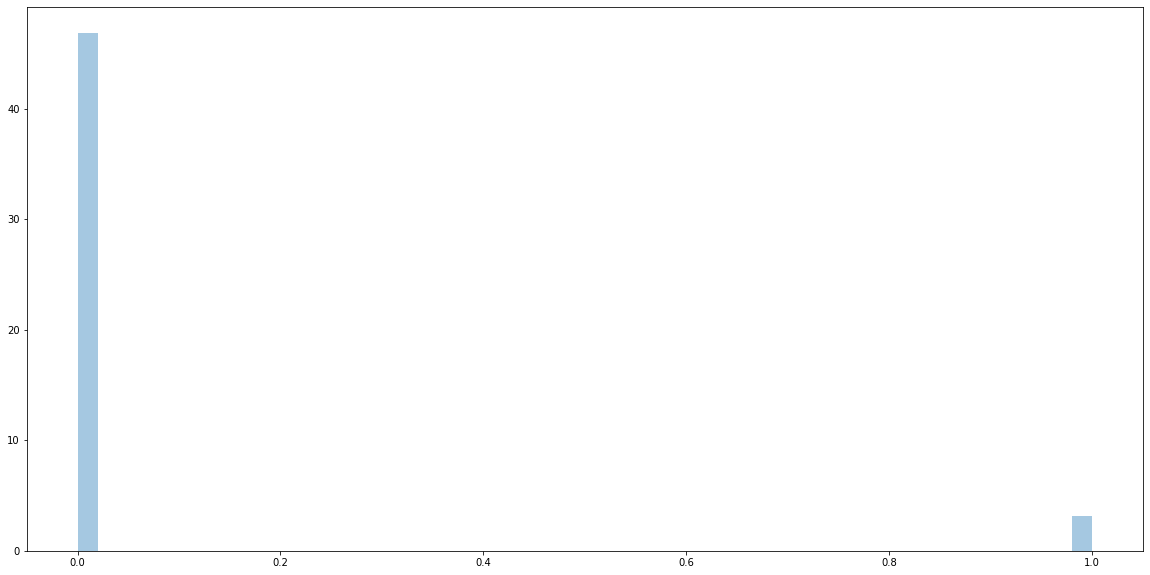

In [61]:
sns_plot = sns.distplot(img1_bin)
'''sns_plot = sns.distplot(img2_bin.ravel())
sns_plot = sns.distplot(img3_bin.ravel())
sns_plot = sns.distplot(img4_bin.ravel())
sns_plot = sns.distplot(img5_bin.ravel())
sns_plot = sns.distplot(img6_bin.ravel())
sns_plot = sns.distplot(img7_bin.ravel())
sns_plot = sns.distplot(img8_bin.ravel())
sns_plot = sns.distplot(img9_bin.ravel())'''
fig = sns_plot.get_figure()

In [80]:
img1_resc = rescale_intensity(img1_denoised)
img2_resc = rescale_intensity(img2_denoised)
img3_resc = rescale_intensity(img3_denoised)
img4_resc = rescale_intensity(img4_denoised)

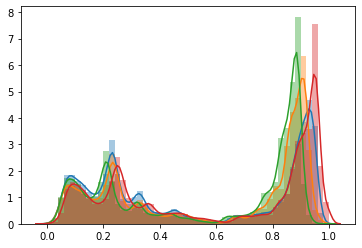

In [81]:
sns_plot = sns.distplot(img1_resc.ravel())
sns_plot = sns.distplot(img2_resc.ravel())
sns_plot = sns.distplot(img3_resc.ravel())
sns_plot = sns.distplot(img4_resc.ravel())
fig = sns_plot.get_figure()

In [89]:
img1_eqa = equalize_hist(img1)
img2_eqa = equalize_hist(img2)
img3_eqa = equalize_hist(img3)
img4_eqa = equalize_hist(img4)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


MemoryError: Unable to allocate 369. MiB for an array with shape (48330240,) and data type float64

In [ ]:
sns_plot = sns.distplot(img1_eqa.ravel())
sns_plot = sns.distplot(img2_eqa.ravel())
sns_plot = sns.distplot(img3_eqa.ravel())
sns_plot = sns.distplot(img4_eqa.ravel())
fig = sns_plot.get_figure()

In [106]:
threshold1 = threshold_isodata(img1_denoised)
threshold2 = threshold_isodata(img1_denoised)
threshold3 = threshold_isodata(img1_denoised)
threshold4 = threshold_isodata(img1_denoised)

In [116]:
img1_bin = img1_denoised > threshold1
img2_bin = img2_denoised > threshold2
img3_bin = img3_denoised > threshold3
img4_bin = img4_denoised > threshold4

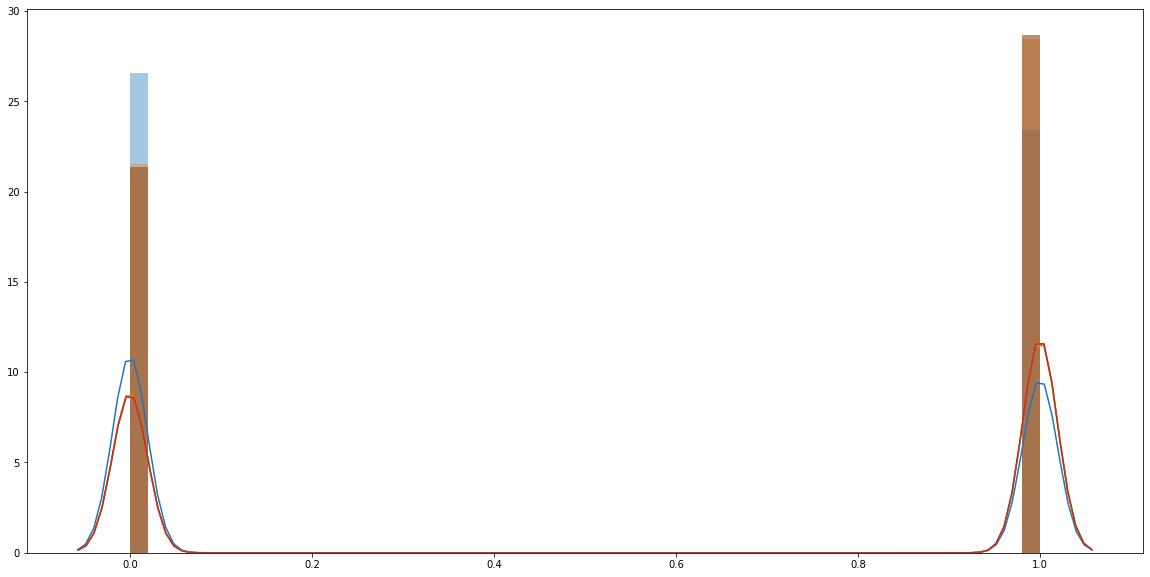

In [117]:
sns_plot = sns.distplot(img1_bin.ravel())
sns_plot = sns.distplot(img2_bin.ravel())
sns_plot = sns.distplot(img3_bin.ravel())
sns_plot = sns.distplot(img4_bin.ravel())
fig = sns_plot.get_figure()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 7200x4320 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000228149AB648>,
       dtype=object))

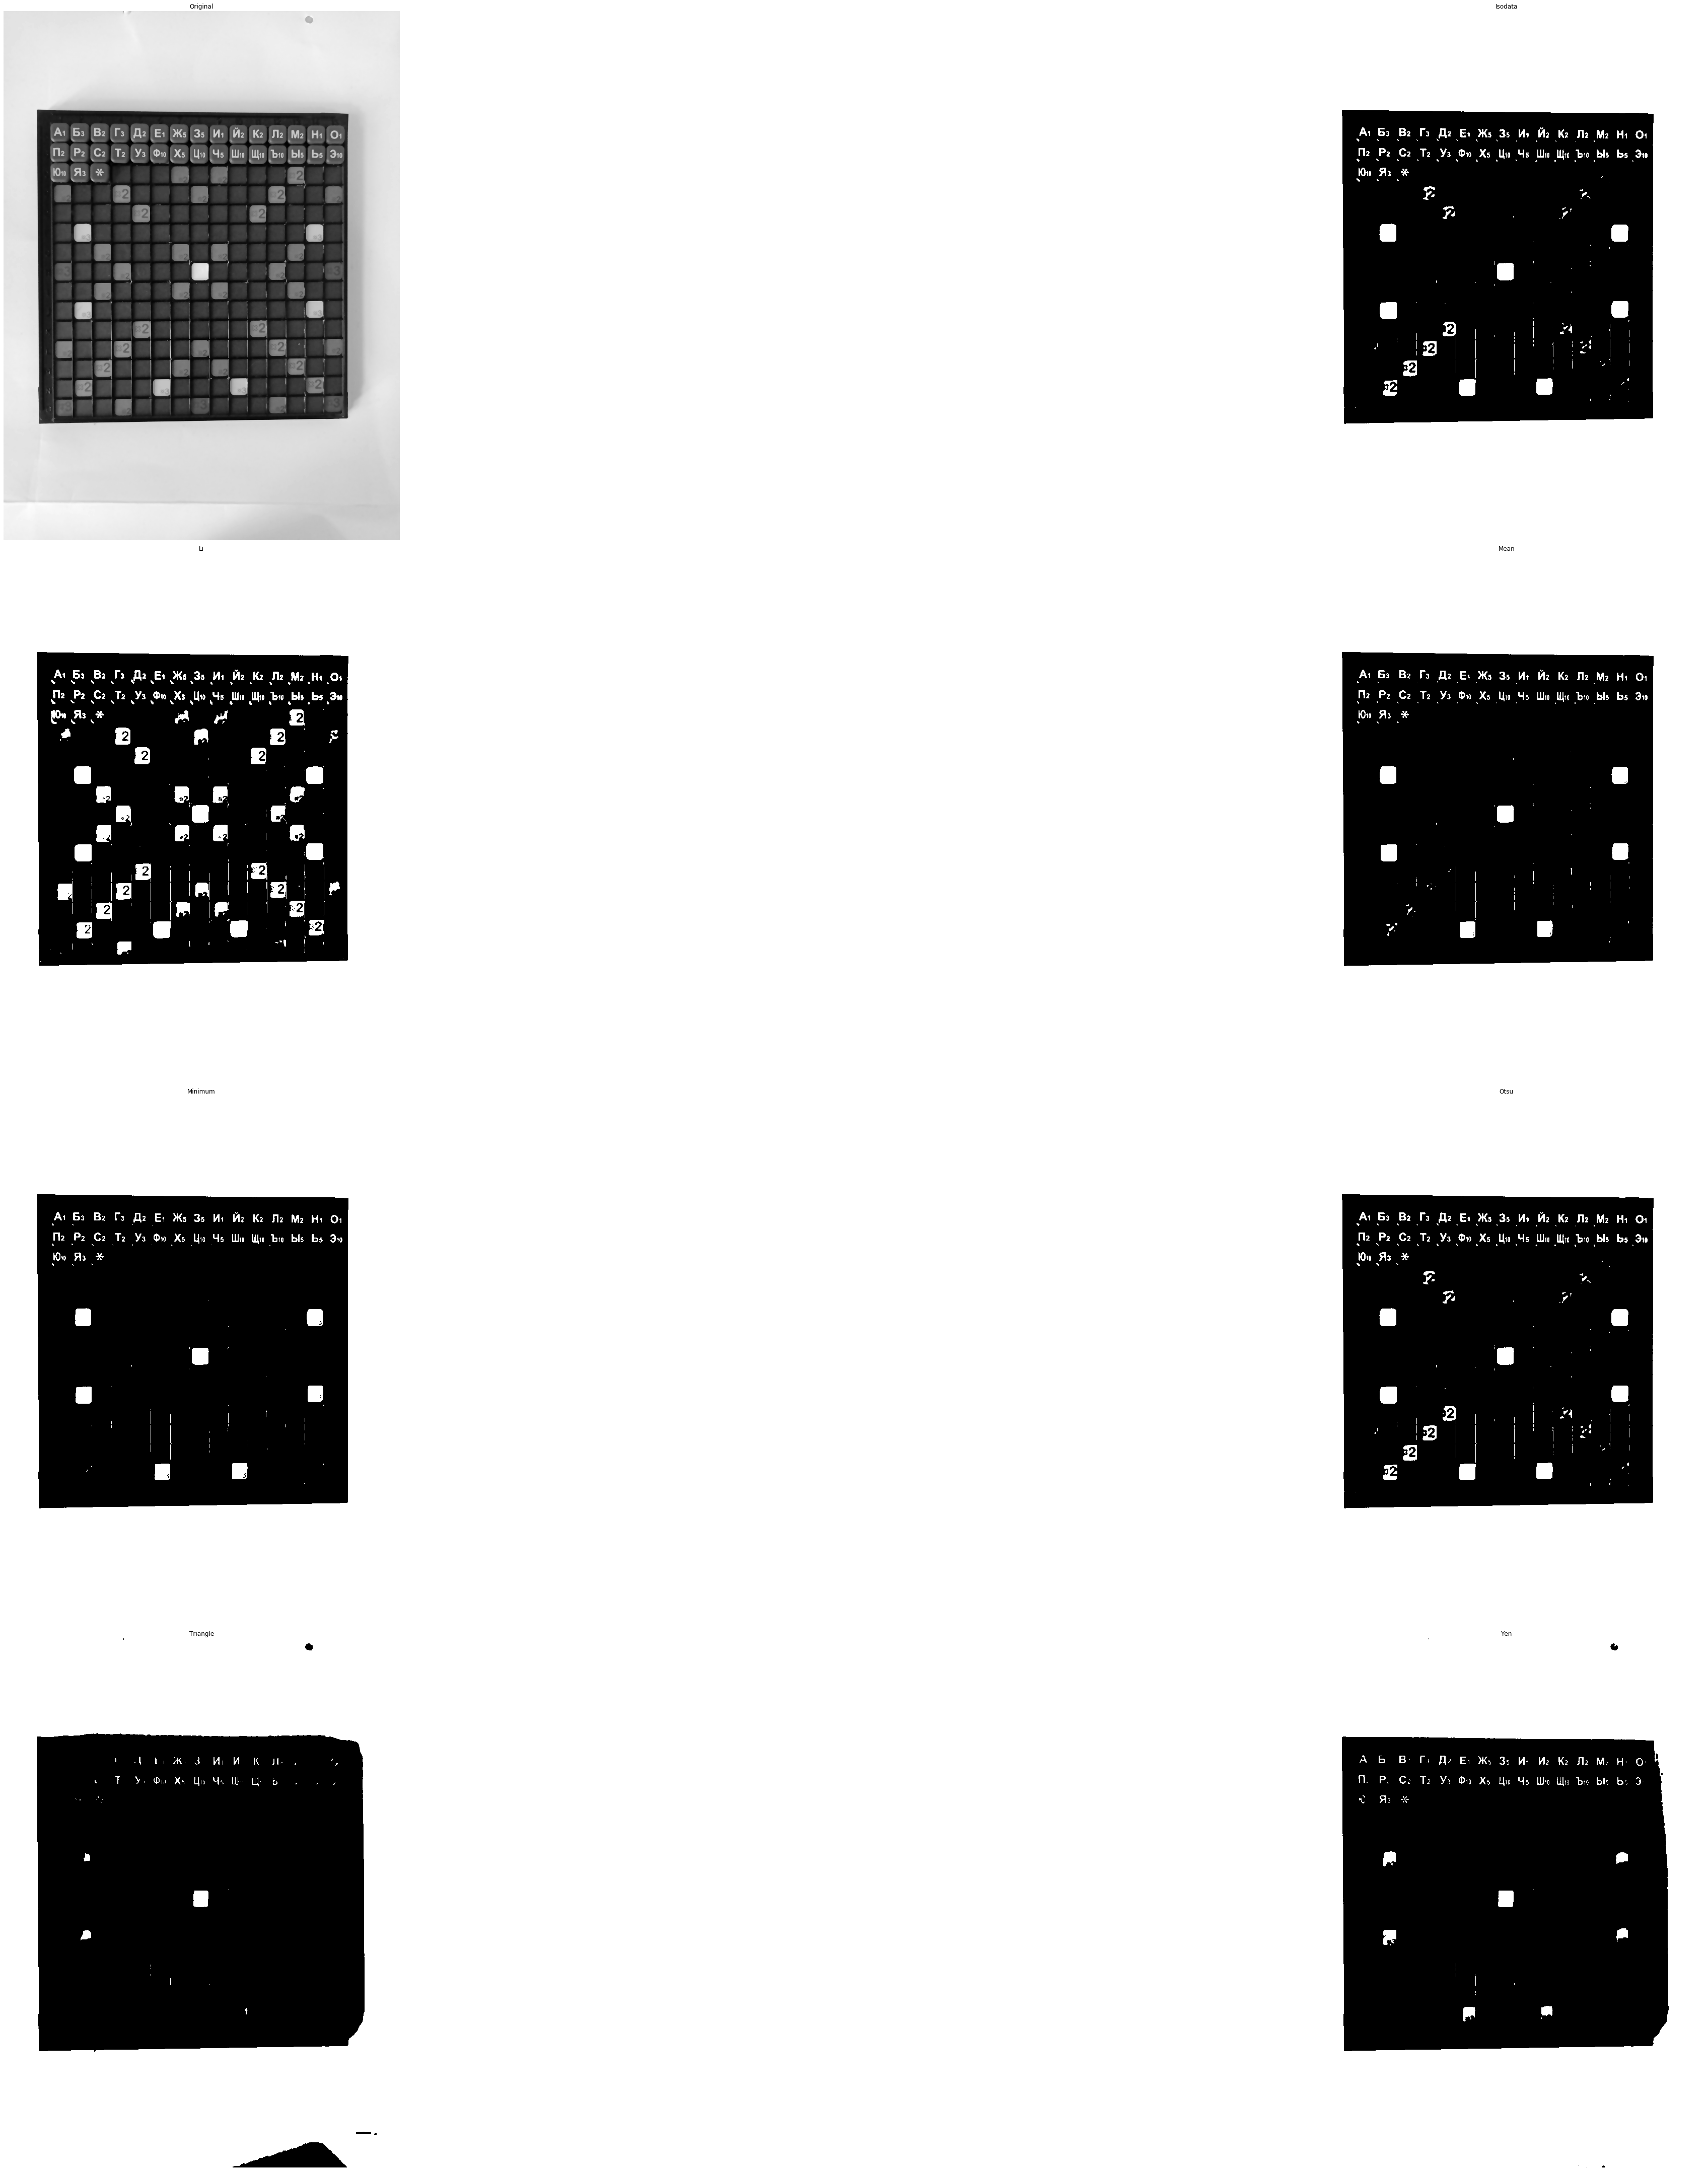

In [56]:
try_all_threshold(img2_denoised, figsize=(100, 60))